In [1]:
#1.Обучите модель линейной регресси на данных, используя в качестве целевой переменной рост (height), а в качестве признака вес (weight).
#2.Вычислите значение среднеквадратичной ошибки для построенной модели
#3.Постройте прямую регресии и точки обучающей выборки
#4.Расширьте пространство признаков, добавив туда пол и repwt.
#5.Оцените как изменилась среднеквадратичная ошибка

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [3]:
ds

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
198,M,81,175,NaN,NaN
199,M,90,181,91.0,178.0


In [4]:
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Рост, см')

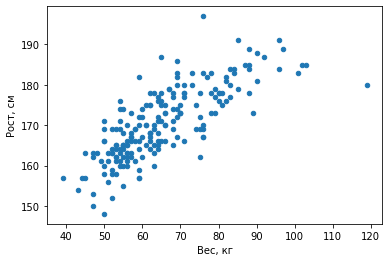

In [5]:
%pylab inline
import seaborn as sns  # для красивого стиля графиков
ax = ds.plot.scatter(x='weight', y='height')
ax.set_xlabel('Вес, кг')
ax.set_ylabel('Рост, см')

In [6]:
ds=ds.dropna() # убрать пропуски
ds

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
195,F,62,164,61.0,161.0
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
199,M,90,181,91.0,178.0


mse: 54.393


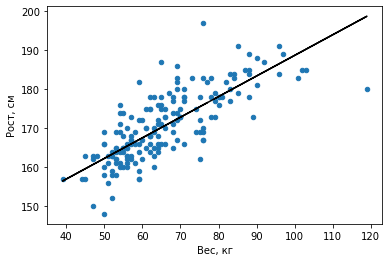

In [7]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 

X = np.array(ds['weight']).reshape((-1,1))
Y = np.array(ds['height'])

x_train, x_test, y_train, y_test = train_test_split(X, Y) # разделение на тренировочные и тестовые наборы

model = LinearRegression().fit(x_train, y_train) # обучение
y_pred = model.predict(x_test) 

pred = model.predict(X)

#построение графика
ax = ds.plot.scatter(x='weight', y='height')
ax.set_xlabel('Вес, кг')
ax.set_ylabel('Рост, см')
plot(X, pred,  color='black')

mse = mean_squared_error(y_test, y_pred) #вычисление СКО
print('mse: %.3f'%(mse))

In [8]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
ds['sex'] = labelencoder.fit_transform(ds['sex']) #Преобразование текстовых данных в числовые

X = np.array(ds[['sex','weight','repwt',]])

Y = np.array(ds['height'])

x_train, x_test, y_train, y_test = train_test_split(X, Y)

model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('mse: %.3f' % (mse))

mse: 27.427


<ipython-input-8-02b4a13686fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['sex'] = labelencoder.fit_transform(ds['sex']) #Преобразование текстовых данных в числовые
